# Clustering of Spotify-Songs with Fuzzy

## Overview over the Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./daten/spotify_dataset.csv', sep=",").drop('Index', axis = 1)
display(df.head())
df = df.dropna()
print("Länge des Spotify Datensatztes", len(df))

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


Länge des Spotify Datensatztes 1556


In [ ]:
df.columns

## Data Preparation

In [2]:
import category_encoders as ce

# leere Werte löschen
df = df.drop([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538])

# lösche Zeilen ohne Genres
df = df[df.Genre != '[]']
print("Länge des Spotify Datensatztes", len(df))


#df columns dateype convert
df[['Artist Followers','Duration (ms)', 'Popularity']] = df[['Artist Followers', 'Duration (ms)', 'Popularity']].apply(pd.to_numeric)
df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']] = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].astype('float')
df[['Song Name', 'Artist','Song ID', 'Chord']] = df[['Song Name', 'Artist','Song ID', 'Chord']].astype('string')


df['Duration(s)'] = df['Duration (ms)']/1000

#Streams in int umwandeln
df['Streams'] = df['Streams'].replace(',','', regex=True)
df['Streams'] = df['Streams'].astype('int64')

#devide the Date
df[['Start Highest Charting', 'End Highest Charting']]= df['Week of Highest Charting'].str.split('--', expand = True)

#add datatype Date
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Start Highest Charting'] = pd.to_datetime(df['Start Highest Charting'])
df['End Highest Charting'] = pd.to_datetime(df['End Highest Charting'])

df['Start Highest Charting'] = pd.to_numeric(df['Start Highest Charting'])
df['Release Date'] = pd.to_numeric(df['Release Date'])

Länge des Spotify Datensatztes 1470


In [3]:
df['Genre'] = df['Genre'].str.strip('[]')
genre_names = df['Genre'].str.split(',', expand=True)
genre_names = genre_names.fillna('NA')
genres_splitted = df['Genre'].str.split(',', expand=True)
enc = ce.OneHotEncoder(return_df=True, use_cat_names=True, drop_invariant=True)
genres_splitted_expand = enc.fit_transform(genres_splitted)

C:\Users\burak\anaconda3\lib\site-packages\category_encoders\one_hot.py:270: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(col, 1, inplace=True)


In [ ]:
display(genres_splitted_expand)
# display(np.unique(df['Genre'].values))
# print(genre_names.values)
print(np.unique(genre_names.values))
# print(len(np.unique(genre_names.values)))

In [4]:
unq = np.unique(genre_names.values)
filt = unq[382]
display(genres_splitted_expand.filter(regex=f'{unq[382]}'))
display(genres_splitted_expand.filter(regex="'pop'"))
display(genres_splitted_expand.filter(regex=filt))

,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


,0_'pop',1_ 'pop',2_ 'pop',3_ 'pop',4_ 'pop',5_ 'pop',6_ 'pop',7_ 'pop'
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1551,0,1,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0
1553,0,0,1,0,0,0,0,0
1554,0,0,0,0,0,0,0,0


In [5]:
genre_df = pd.DataFrame()
for indx, genre in enumerate(unq):
    filter_genre = genres_splitted_expand.filter(regex=genre)
    sum_columns = filter_genre.sum(axis=1)
    sum_columns.name = genre
    genre_df.insert(loc=indx, column=genre, value=sum_columns)
genre_df = genre_df.drop(columns=['NA'])

C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
display(genre_df.head())
print(type(genre_df[' \'art rock\''][0]))

,'american folk revival','art rock','atl trap','australian pop','beatlesque','bedroom pop','brill building pop','britpop','brostep','canadian contemporary r&b',...,'trap argentino','trap chileno','trap latino','trap queen','tropical house','uk hip hop','urbano espanol','venezuelan hip hop','viral rap','weirdcore'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'numpy.int64'>


In [7]:
pop = []
hiphop = []
rock = []
rap = []
electro = []
soul = []
house = []
indie = []
country = []
folk = []

for item in genre_df.columns:
    if 'pop' in item:
        pop.append(item)
    if 'hip hop' in item:
        hiphop.append(item)
    if 'rap' in item:
        rap.append(item)
    if 'rock' in item:
        rock.append(item)
    if 'metal' in item: #gehört zu Genre Rock
        rock.append(item)
    if 'electro' in item:
        electro.append(item)
    if 'drill' in item:
        electro.append(item)
    if 'soul' in item:
        soul.append(item)
    if 'funk' in item:
        soul.append(item)
    if 'house' in item:
        house.append(item)
    if 'indie' in item:
        indie.append(item)
    if 'country' in item:
        country.append(item)
    if 'country' in item:
        country.append(item)
        
print(len(pop) + len(hiphop) + len(rock) + len(rap) + len(electro) + len(soul) 
      + len(house) + len(indie) +len(country) + len(folk))


323


In [8]:
#pop_genre = pd.Dataframe(genre_df[filtered_pop.index].sum(axis = 1), columns = ['pop'])

df["pop"] = 0
df["hip hop"] = 0
df["rap"] = 0
df["rock"] = 0
df["electro"] = 0
df["soul"] = 0
df["house"] = 0
df["indie"] = 0
df["country"] = 0
df["folk"] = 0


for item in pop:
    df["pop"] = df["pop"] + genre_df[item]
for item in hiphop:
    df["hip hop"] = df["hip hop"] + genre_df[item]
for item in rap:
    df["rap"] = df["rap"] + genre_df[item]
for item in rock:
    df["rock"] = df["rock"] + genre_df[item]
for item in electro:
    df["electro"] = df["electro"] + genre_df[item]
for item in soul:
    df["soul"] = df["soul"] + genre_df[item]
for item in house:
    df["house"] = df["house"] + genre_df[item]
for item in indie:
    df["indie"] = df["indie"] + genre_df[item]
for item in country:
    df["country"] = df["country"] + genre_df[item]
for item in folk:
    df["folk"] = df["folk"] + genre_df[item]

#Werte über 1 mit 1 ersetzen
df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]] = np.where(
    df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]] > 1, 1, 
    df[["pop", "hip hop", "rap", "rock", "electro", "soul", "house", "indie", "country", "folk"]])

# Daten Transformationsarten

Standardisieren MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_final = df.copy()
df_final.drop(['Song Name', 'Artist','Week of Highest Charting','Song ID', 'Chord','Genre', 'Weeks Charted', 'End Highest Charting', 'Duration (ms)'], inplace=True, axis=1)

scaler = MinMaxScaler()
scaler.fit(df_final[['Highest Charting Position', 'Streams','Number of Times Charted', 'Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])
df_final[['Highest Charting Position', 'Streams','Number of Times Charted', 'Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']] = scaler.transform(df_final[['Highest Charting Position', 'Streams', 'Number of Times Charted','Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])
df_final

Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

df_final = df.copy()
df_final.drop(['Release Date', 'Artist','Chord', 'Song Name', 'Number of Times Charted','Highest Charting Position','Artist Followers', 'Popularity', 'Streams', 'Song ID', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre'], inplace=True, axis=1)

scaler = RobustScaler()
scaler.fit(df_final[['Loudness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']])
df_final[['Loudness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']] = scaler.transform(df_final[['Loudness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']])
df_final

Logarthmieren von Daten

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df.drop(['Song Name', 'Artist','Chord','Genre', 'Weeks Charted', 'End Highest Charting', 'Duration (ms)','Highest Charting Position', 'Streams', 'Week of Highest Charting','Song ID'], inplace=True, axis=1)
df[['Loudness']] = df[['Loudness']]*(-1)
df = np.log10(df)
df_final = df.copy()


scaler = MinMaxScaler()
scaler.fit(df_final[['Number of Times Charted', 'Artist Followers', 'Release Date',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']])
df_final[['Number of Times Charted', 'Artist Followers', 'Release Date',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']] = scaler.transform(df_final[['Number of Times Charted', 'Artist Followers', 'Release Date',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Duration(s)',
       'Start Highest Charting']])

df_final

# Standardisieren

In der weiteren Analyse wird der Block ausgeführt und mit diesem transformierten Datensatz weiter analysiert

In [10]:
#Normaliserung der Daten
from sklearn.preprocessing import MinMaxScaler

df_final = df.copy()
df_final.drop(['Song Name', 'Streams', 'Song ID', 'End Highest Charting', 'Weeks Charted', 'Week of Highest Charting', 'Duration (ms)', 'Genre'], inplace=True, axis=1)

scaler = MinMaxScaler()
scaler.fit(df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])
df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']] = scaler.transform(df_final[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Release Date', 'Popularity','Tempo', 'Loudness', 'Start Highest Charting','Duration(s)']])

In [ ]:
display(df_final.head())
print(df_final.columns)
print(df_final.info())

In [ ]:
%matplotlib inline
 
#Korrelation's plot
df_o = df_final.copy()

df_o.drop(['Artist', 'Chord'], inplace=True, axis=1)
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_o.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [ ]:
#Remove high correlated variables
#nicht ausführen, FALLS NÖTIG
df_o = df_final.copy()
df_o.drop(['Artist', 'Chord'], inplace=True, axis=1)
df_corr = df_o.corr()

threshold = 0.95

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_o.columns[columns]
selected_columns
df_final = df_o[selected_columns]
print(selected_columns)

## Applying of Fuzzy Clustering

In [30]:
import numpy as np
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from fcmeans import FCM

In [12]:
# df_final.drop(['Artist','Number of Times Charted', 'Highest Charting Position', 'Start Highest Charting', 'Release Date', 
#                'Chord','pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#                'country', 'folk'], inplace=True, axis=1)

# df_final.drop(['Artist', 'Start Highest Charting', 'Release Date', 
#                'Chord','pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#                'country', 'folk'], inplace=True, axis=1)

# df_final.drop(['Highest Charting Position', 'Number of Times Charted', 'Artist',
#                'Artist Followers', 'Release Date', 'Popularity','Start Highest Charting','Chord',
#                'pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#                'country', 'folk'], inplace=True, axis=1) #PC:0.348

# df_final.drop(['Artist','Chord','pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#                 'country', 'folk'], inplace=True, axis=1) #alles standardisieren 0.250

# df_final.drop(['Artist', 'Start Highest Charting', 'Highest Charting Position', 'Number of Times Charted','Release Date', 
#                 'Chord','pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#                 'country', 'folk'], inplace=True, axis=1) #PC: alles standardisieren 0.250 /ohne standardisieren 0.455

# df_final.drop(['Highest Charting Position','Artist',
#         'Release Date','Chord',
#         'pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
#         'country', 'folk'], inplace=True, axis=1) PC:0.255

df_final.drop(['Highest Charting Position','Artist','Chord',
        'pop', 'hip hop', 'rap', 'rock', 'electro', 'soul', 'house', 'indie',
        'country', 'folk'], inplace=True, axis=1)

In [37]:
df_final

,Number of Times Charted,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration(s),Start Highest Charting
0,0.049645,0.040475,0.954109,1.000000,0.714,0.800,0.763187,0.0504,0.12700,0.3590,0.550500,0.589,0.325134,1.000000
1,0.014184,0.026702,0.999140,0.985915,0.591,0.764,0.737844,0.0483,0.03830,0.1030,0.777085,0.478,0.200129,1.000000
2,0.070922,0.075140,0.997454,0.985915,0.563,0.664,0.754339,0.1540,0.33500,0.0849,0.758164,0.688,0.265255,0.951220
3,0.028369,0.999467,0.998658,0.971831,0.808,0.897,0.804274,0.0348,0.04690,0.3640,0.500196,0.591,0.360046,0.963415
4,0.000000,0.065625,0.999622,0.943662,0.736,0.704,0.665679,0.0615,0.02030,0.0501,0.651368,0.894,0.325923,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.000000,0.325955,0.947607,0.704225,0.762,0.700,0.717713,0.0694,0.00261,0.1530,0.437422,0.608,0.321120,0.000000
1552,0.000000,0.180172,0.977227,0.521127,0.528,0.870,0.826354,0.0851,0.24000,0.3330,0.666347,0.714,0.272035,0.000000
1553,0.000000,0.272328,0.955313,0.732394,0.765,0.523,0.780993,0.0300,0.18400,0.1320,0.367509,0.394,0.335434,0.000000
1554,0.000000,0.002445,0.976676,0.436620,0.832,0.550,0.680037,0.0587,0.24900,0.1820,0.677031,0.881,0.219802,0.000000


In [ ]:
print(df_final.columns)
df_final.shape

Dataframe in numpy array umwandeln -> fcm erwartet ein np.array als Eingabeparameter

In [38]:
dist_matrix = np.asarray(df_final)
dist_matrix

array([[0.04964539, 0.04047476, 0.95410919, ..., 0.589     , 0.3251345 ,
        1.        ],
       [0.0141844 , 0.02670181, 0.99913998, ..., 0.478     , 0.20012867,
        1.        ],
       [0.07092199, 0.07513996, 0.99745433, ..., 0.688     , 0.26525521,
        0.95121951],
       ...,
       [0.        , 0.27232778, 0.95531322, ..., 0.394     , 0.33543367,
        0.        ],
       [0.        , 0.00244498, 0.97667618, ..., 0.881     , 0.2198023 ,
        0.        ],
       [0.        , 0.50667541, 0.97836183, ..., 0.422     , 0.34260205,
        0.        ]])

In [39]:
#Test beispiel für die fcm Funktion

fcm = FCM(n_clusters = 2)
fcm.fit(dist_matrix)
fcm

FCM(n_clusters=2, max_iter=150, m=2.0, error=1e-05, random_state=None, trained=True, rng=Generator(PCG64) at 0x1EE204E1138, u=array([[0.56028682, 0.43971318],
       [0.55227459, 0.44772541],
       [0.55976224, 0.44023776],
       ...,
       [0.41493064, 0.58506936],
       [0.44380759, 0.55619241],
       [0.46555638, 0.53444362]]), _centers=array([[0.06686142, 0.18148221, 0.9651606 , 0.61693791, 0.68594877,
        0.63378688, 0.70457642, 0.1229402 , 0.25042848, 0.18249334,
        0.47822513, 0.5114395 , 0.30236911, 0.49370757],
       [0.06821543, 0.18777171, 0.96620601, 0.59779486, 0.69636489,
        0.63472447, 0.70686136, 0.12733357, 0.23706859, 0.18221844,
        0.47979585, 0.51177335, 0.30181407, 0.37928096]]))

In [ ]:
listOfProp = fcm.u
Cluster = []
Cluster_prob = []
for i in range(len(listOfProp)):
    Cluster.append(listOfProp[i].argmax())
    Cluster_prob.append(max(listOfProp[i]))


#add to the dataframe
df_final["Cluster"] = Cluster
df_final["Cluster Probability"] = Cluster_prob

Optimale Clusteranzahl bestimmen

In [41]:
n_clusters_list = [2, 3, 4, 5, 6, 7] # k von 2 bis 7  
models = list()
for n_cl in n_clusters_list:
    fcm = FCM(n_clusters = n_cl)
    fcm.fit(dist_matrix)
    models = np.append(models, fcm)

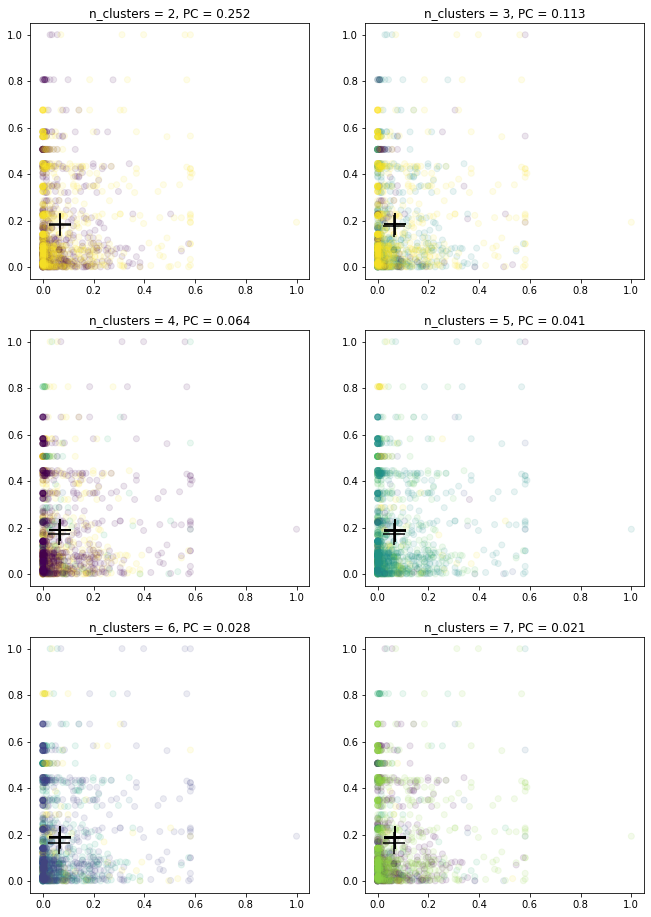

In [42]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient

    fcm_centers = model.centers
    fcm_labels = model.predict(dist_matrix)
    # plot result
    axe.scatter(dist_matrix[:,0], dist_matrix[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}')
plt.show()

Silhouette

Text(0, 0.5, 'Silhouette score')

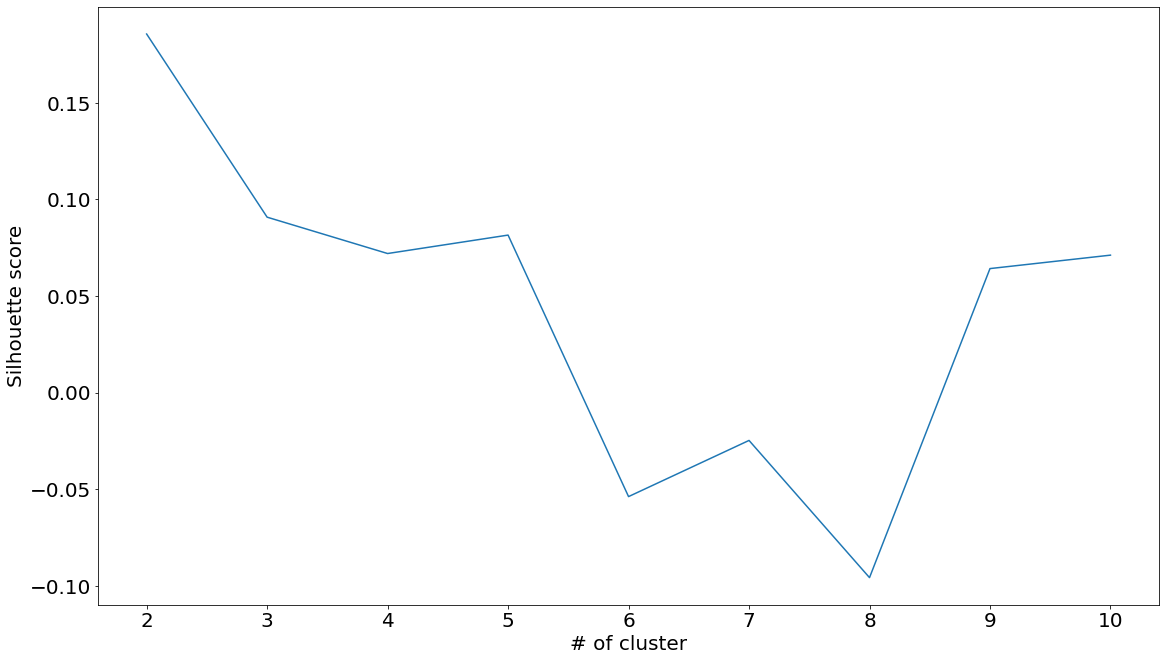

In [45]:
#Der Silhouettenwert ist ein Maß dafür, wie ähnlich ein Objekt seinem eigenen Cluster (Kohäsion) 
#im Vergleich zu anderen Clustern ist (Trennung).

from sklearn.metrics import silhouette_score

def Silhouette(x, kmax):
    sil = [None, None]
    for k in range(2, kmax+1):
        fcm = FCM(n_clusters = k)
        fcm.fit(x)
        labels  = fcm.u.argmax(axis=1)
        sil.append(silhouette_score(x, labels, metric = 'euclidean'))
    return sil

fig = plt.figure(figsize= (19,11))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.plot(Silhouette(dist_matrix, 10))
ax.set_xlabel('# of cluster', fontsize = 20)
ax.set_ylabel('Silhouette score', fontsize = 20)

In [ ]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_cl in n_clusters_list:
    fcm = FCM(n_clusters = n_cl)
    fcm.fit(x_r)
    models = np.append(models, fcm)
    
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient

    fcm_centers = model.centers
    fcm_labels = model.predict(x_r)
    # plot result
    axe.scatter(x_r[:,0], x_r[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}')
plt.show()

# PARTICIAL COMPONENT ANALYSIS

In [18]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components = 2)
x_r = pca.fit(dist_matrix).transform(dist_matrix)
x_r
#print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

array([[ 0.60124568, -0.32135729],
       [ 0.59768228, -0.31405101],
       [ 0.5843853 , -0.1360468 ],
       ...,
       [-0.41982954,  0.08258578],
       [-0.43183583, -0.12245505],
       [-0.41706017,  0.29009918]])

In [46]:
fcm = FCM(n_clusters=3)
fcm.fit(x_r)

# Silhouette mit PCA Komponenten

Text(0, 0.5, 'Silhouette score')

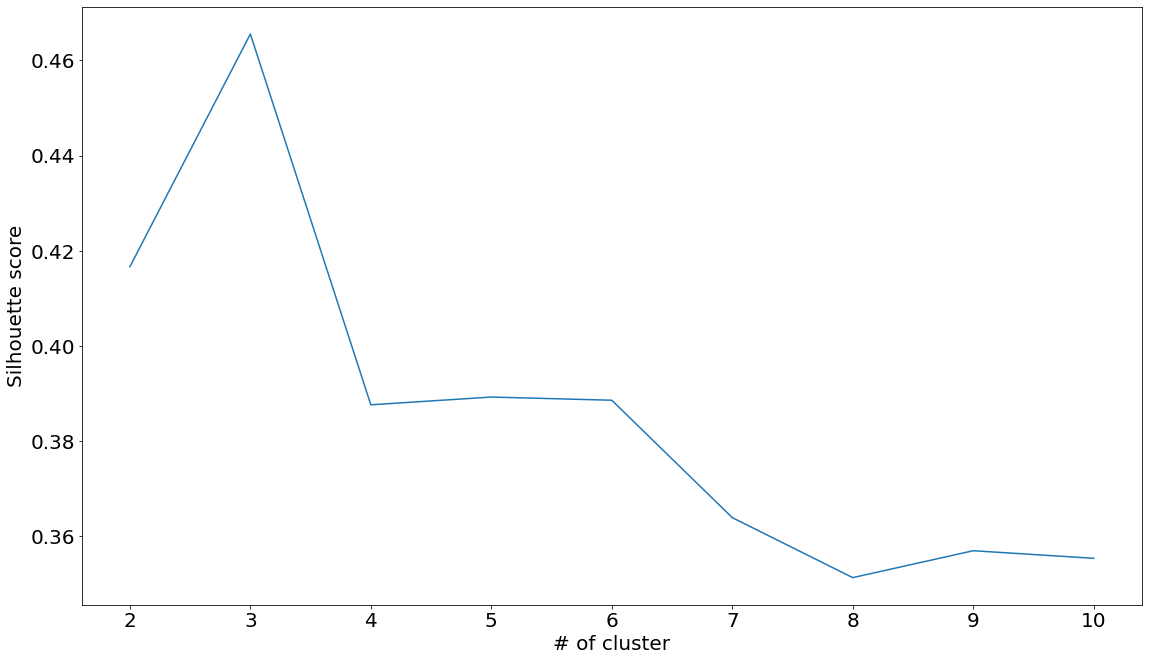

In [56]:
#Der Silhouettenwert ist ein Maß dafür, wie ähnlich ein Objekt seinem eigenen Cluster (Kohäsion) 
#im Vergleich zu anderen Clustern ist (Trennung).

from sklearn.metrics import silhouette_score

def Silhouette(x, kmax):
    sil = [None, None]
    for k in range(2, kmax+1):
        fcm = FCM(n_clusters = k)
        fcm.fit(x)
        labels  = fcm.u.argmax(axis=1)
        sil.append(silhouette_score(x, labels, metric = 'euclidean'))
    return sil

fig = plt.figure(figsize= (19,11))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.plot(Silhouette(x_r, 10))
ax.set_xlabel('# of cluster', fontsize = 20)
ax.set_ylabel('Silhouette score', fontsize = 20)

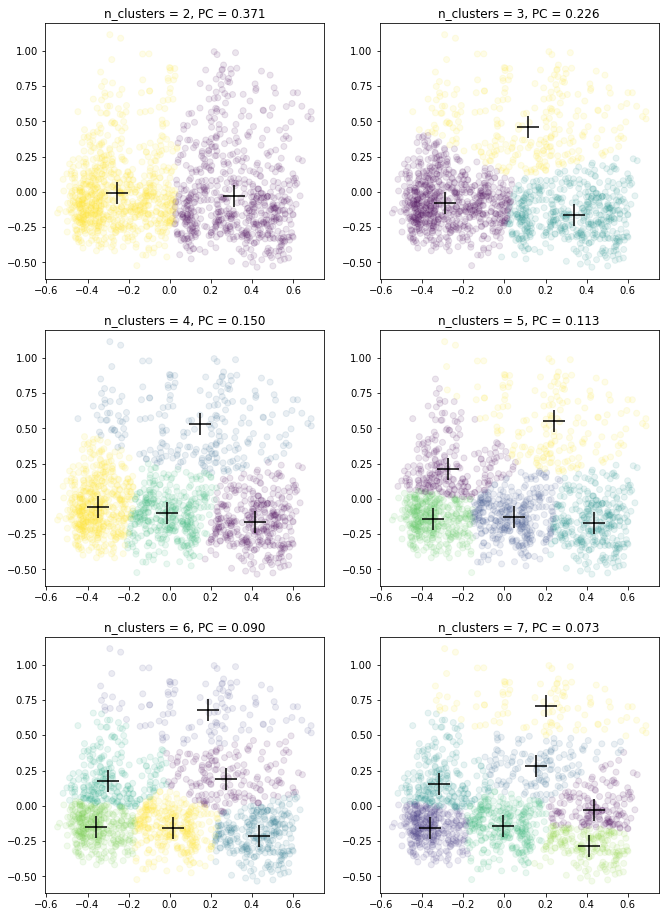

In [48]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_cl in n_clusters_list:
    fcm = FCM(n_clusters = n_cl)
    fcm.fit(x_r)
    models = np.append(models, fcm)
    
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient

    fcm_centers = model.centers
    fcm_labels = model.predict(x_r)
    # plot result
    axe.scatter(x_r[:,0], x_r[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}')
plt.show()

# Beste Lösung mit PCA

In [49]:
pca = PCA(n_components = 2)
x_r = pca.fit(dist_matrix).transform(dist_matrix)

fcm = FCM(n_clusters=3)
fcm.fit(dist_matrix)


listOfProp = fcm.u #Wahrscheinlichkeit
Cluster = []
Cluster_prob = []
for i in range(len(listOfProp)):
    Cluster.append(listOfProp[i].argmax())
    Cluster_prob.append(max(listOfProp[i]))

#add to the dataframe
data_df = pd.DataFrame(x_r, columns=['PC_1', 'PC_1'])
data_df["Cluster"] = Cluster
data_df["Cluster Probability"] = Cluster_prob

In [57]:
print("Cluster 0: ", len(data_df[data_df["Cluster"] == 0]))
print("Cluster 1: ", len(data_df[data_df["Cluster"] == 1]))
print("Cluster 2: ", len(data_df[data_df["Cluster"] == 2]))
data_df

Cluster 0:  656
Cluster 1:  111
Cluster 2:  703


,PC_1,PC_1,Cluster,Cluster Probability
0,0.601246,-0.321358,0,0.416076
1,0.597683,-0.314052,0,0.403907
2,0.584386,-0.136047,0,0.413676
3,0.431149,-0.305035,0,0.362110
4,0.578670,-0.468753,0,0.398411
...,...,...,...,...
1465,-0.456792,-0.193366,2,0.384986
1466,-0.423662,-0.139525,2,0.373079
1467,-0.419829,0.082585,2,0.385950
1468,-0.431836,-0.122455,2,0.369197
